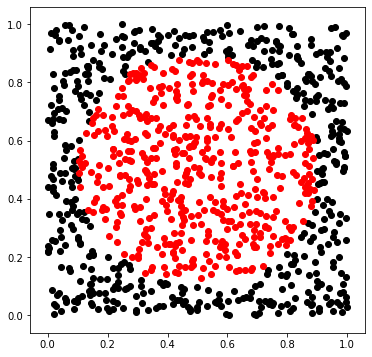

In [1]:
import torch
import math
import matplotlib.pyplot as plt

import Modules
import Sequential
import Optimizer
from helpers import generate_disc_set, plot_data

data, target, data_test, target_test = generate_disc_set(1000, show_data=True)

In [2]:
m = Modules.Linear(2,20)
op = m(data)
print(op.size())

b = Modules.ReLu()
print(b(op).size())

torch.Size([1000, 20])
torch.Size([1000, 20])


0 train_loss 790.59 test_error 47.50%


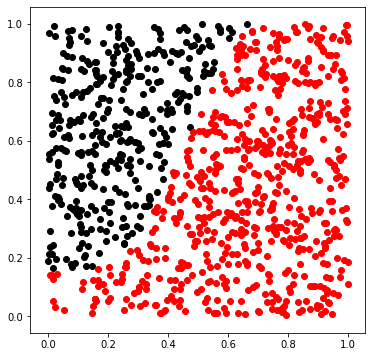

100 train_loss 429.56 test_error 19.20%


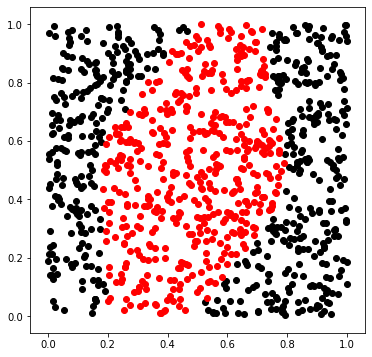

200 train_loss 392.18 test_error 41.70%


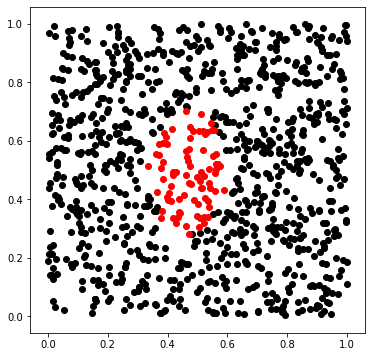

300 train_loss 287.13 test_error 27.20%


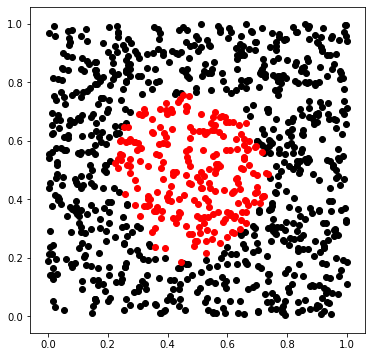

400 train_loss 239.21 test_error 17.00%


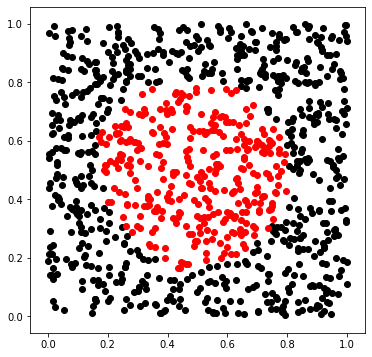

500 train_loss 201.79 test_error 13.50%


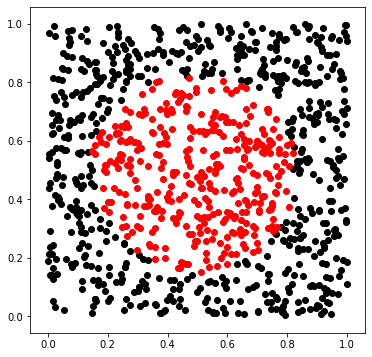

600 train_loss 181.29 test_error 10.90%


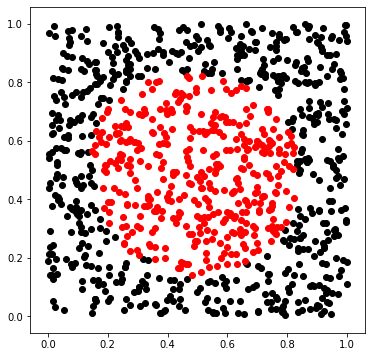

700 train_loss 166.60 test_error 9.60%


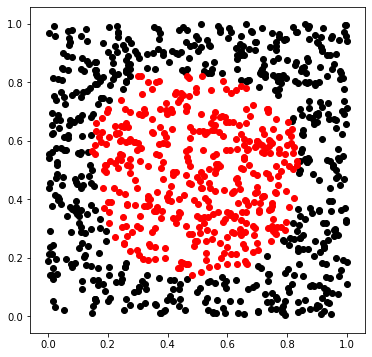

800 train_loss 156.15 test_error 8.50%


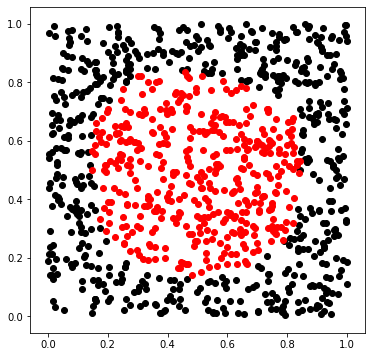

900 train_loss 147.14 test_error 7.30%


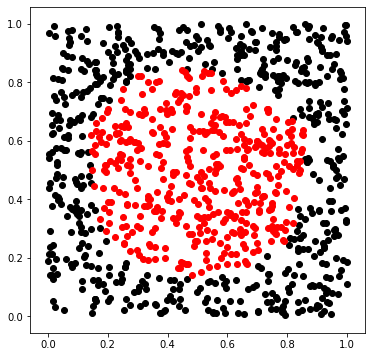

999 train_loss 137.73 test_error 6.40%


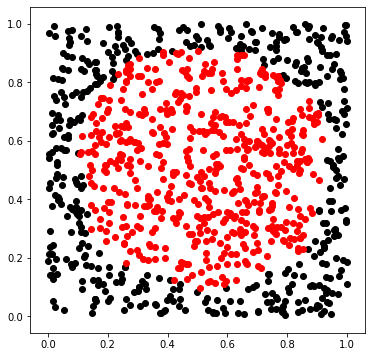

In [3]:
# Train :

torch.set_grad_enabled(False)

nb_epochs = 100
losses = []

# Modules sequence
m1 = Modules.Linear(2,25)
m2 = Modules.Linear(25,25)
m3 = Modules.Linear(25,25)
m4 = Modules.Linear(25,2)
relu1 = Modules.ReLu()
relu2 = Modules.ReLu()
tanh1 = Modules.Tanh()
tanh2 = Modules.Tanh()
sequence = Modules.Sequential(m1, relu1, m2, relu2, m3, tanh1, m4, tanh2)

# loss criterion
MSE = Modules.MSE()

# Optimizer
#sgd = Optimizer.SGD(sequence)

# train

for e in range(1000):
    output = sequence(data)
    loss = MSE(output, target)
    sequence.zero_grad()
    sequence.backward(MSE.backward(output, target))
    sequence.step()
    
    test_out = sequence(data_test)
    
    
    predicted_test_classes = test_out.max(1)[1]
    nb_errors = torch.where(target_test != predicted_test_classes)[0].size(0)

    if e%100 == 0:
        print('{:d} train_loss {:.02f} test_error {:.02f}%'.format(e, loss, (100 * nb_errors) / data_test.size(0)))
        plot_data(data_test, predicted_test_classes)
        
print('{:d} train_loss {:.02f} test_error {:.02f}%'.format(e, loss, (100 * nb_errors) / data_test.size(0)))
plot_data(data_test, predicted_test_classes)